In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/train_preprocessed.csv")
val_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/validation_preprocessed.csv")
test_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/test_preprocessed.csv")

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
train_data.drop_duplicates(inplace=True, ignore_index=True)
val_data.drop_duplicates(inplace=True, ignore_index=True)
test_data.drop_duplicates(inplace=True, ignore_index=True)

In [5]:
train_data

,headline,categories
0,حكم ضد وزاره اعماره بتعويض قدره 13 مليار لشركه,"('جورنالات بلادي',)"
1,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش صور,"('كود سبور',)"
2,الاسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)"
3,تحليل هذه ابرز النقط الضائعه في قضيه القتل بمراكش والتي تجعل الجريمه غامضه لحدود الساعه,"('آراء',)"
4,جورنالات بلادي1 اموال المبادره توجه لاحداث مقاه ومحلبات ومطالب بفتح تحقيق ودوزيم مهدده بالافلاس والدوله تتدخل لانقاذها,"('جورنالات بلادي',)"
...,...,...
35939,الكبير لن يستطيع تلبيه دعوه غيريتس للمنتخب,"('آش واقع',)"
35940,سلمي رشيد ضيفه خيمه رمضان بدبي,"('ميديا وثقافة',)"
35941,الفنانه المغربيه ابتسام تسكت مطلوبه بوجده,"('الزين والحداكة',)"
35942,من بعد 15 العام تصوير تتمه فيلم ماروك لي كان نوض روينه,"('ميديا وثقافة',)"


<AxesSubplot:xlabel='categories'>

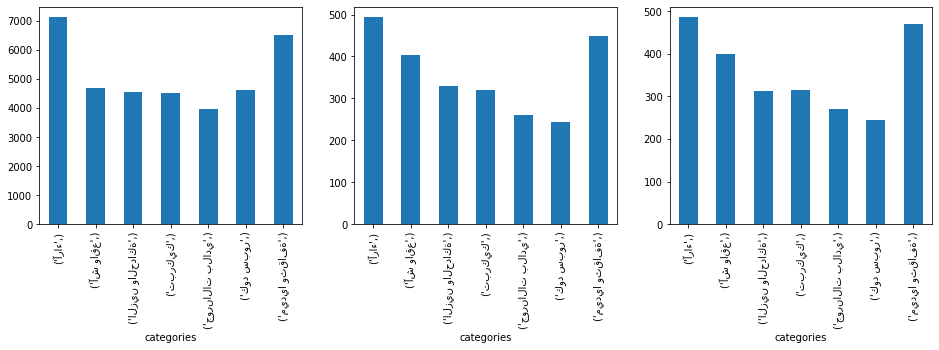

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [7]:
from sklearn.utils import resample

def downsample(data, column, n_samples):

  column_df = data[data["categories"] == column]

  data.drop(data[data["categories"] == column].index, inplace=True)

  column_downsampled = resample(column_df, replace=True, n_samples=n_samples, random_state=42)

  data = pd.concat([column_downsampled, data], ignore_index=True).sort_index()

  return data

In [8]:
for categ in train_data["categories"].unique():
  train_data = downsample(train_data, categ, 4000)

In [9]:
for categ in val_data["categories"].unique():
  val_data = downsample(val_data, categ, 500)

In [10]:
for categ in test_data["categories"].unique():
  test_data = downsample(test_data, categ, 500)

<AxesSubplot:xlabel='categories'>

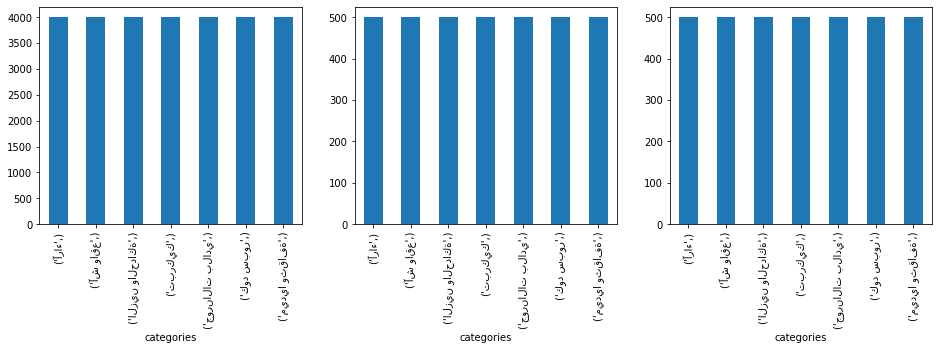

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [12]:
def categ2label(categ):
  labels_dict = {
      "('جورنالات بلادي',)" : 0,
      "('كود سبور',)" : 1,
      "('تبركيك',)" : 2,
      "('آراء',)" : 3,
      "('آش واقع',)" : 4,
      "('ميديا وثقافة',)" : 5,
      "('الزين والحداكة',)" : 6,
  }
  return labels_dict[categ]

In [13]:
train_data["label"] = train_data["categories"].apply(categ2label)
val_data["label"] = val_data["categories"].apply(categ2label)
test_data["label"] = test_data["categories"].apply(categ2label)

In [14]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [15]:
train_data

,headline,categories,label
0,قضيه حمزه مون بيبي المغاربه كيطالبو بتوضيحات رسميه علي لسان سيمو بن بشير,"('تبركيك',)",2
1,نايضه في السعوديه بعدما عطاو كادو ختم الرسول للفنانه المصريه سميه الخشاب صور,"('الزين والحداكة',)",6
2,قضاه جطو كيقرقبو علي اختلالات سوق الجمله فكازا,"('جورنالات بلادي',)",0
3,ابتسام تسكت عايشه الحياه ومامسوقاش لمشاكل مها وخوها -تصاور,"('الزين والحداكة',)",6
4,شركه LG انسحبات من سوق البورطابلات,"('ميديا وثقافة',)",5
...,...,...,...
27995,مبادره زوينه فزمن كورونا راهبات فالحسيمه كيصنعو المئات دالكمامات ويعطيوها للمحتاجين,"('الزين والحداكة',)",6
27996,واش بصح اسماء بوعشرين اعطات مليون لحنان بكور باش تعطيها لمايسه الناجي باش تدافع علي الصحافي راجلها مايسه غاديه تدعيها بعد ما كذبات وبكور مايسه جيتي فطريق حرب داخليه واسماء للاسق ما عنديش مع هاد النزالات,"('ميديا وثقافة',)",5
27997,جورنالات بلادي فضيحه وساطه في منصب سام والتحقيق في مواد خطيره فالدقيق,"('جورنالات بلادي',)",0
27998,عون سلطه نتاحر هاد الصباح فشيشاوه,"('آش واقع',)",4


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features_train = tfidf.fit_transform(train_data['headline']).toarray()
labels_train = train_data["label"]
features_train.shape

(28000, 249579)

In [17]:
# for incremental learning

features_train = features_train.reshape(-1,800,249579)

labels_train = labels_train.values.reshape(-1,800)

features_train.shape, labels_train.shape
# labels_train, labels_val, labels_test = labels_train.reshape(-1,800), labels_val.reshape() labels_test.reshape(-1,800)

((35, 800, 249579), (35, 800))

<AxesSubplot:>

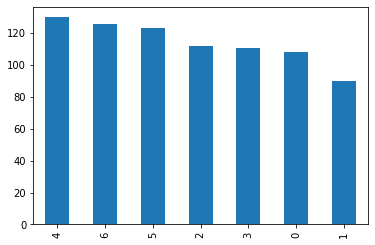

In [18]:
pd.Series(labels_train[0]).value_counts().plot.bar()

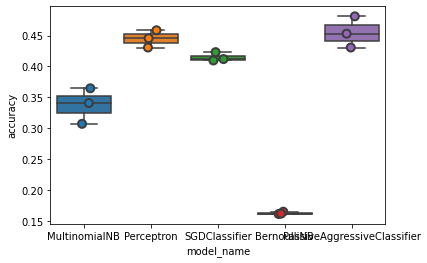

In [19]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier, SGDClassifier
from sklearn.model_selection import cross_val_score
models = [
    MultinomialNB(),
    Perceptron(),
    SGDClassifier(),
    BernoulliNB(),
    PassiveAggressiveClassifier()
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_train[0], labels_train[0], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
PassiveAggressiveClassifier    0.455033
Perceptron                     0.445017
SGDClassifier                  0.414993
MultinomialNB                  0.337534
BernoulliNB                    0.162499
Name: accuracy, dtype: float64

In [21]:
from sklearn.naive_bayes import MultinomialNB

M_NB_model = MultinomialNB()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    M_NB_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [22]:
from sklearn.metrics import classification_report

y_pred = M_NB_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       108
           1       0.86      0.96      0.91        90
           2       0.79      0.75      0.77       112
           3       0.84      0.86      0.85       111
           4       0.83      0.81      0.82       130
           5       0.83      0.73      0.78       123
           6       0.90      0.92      0.91       126

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



<AxesSubplot:>

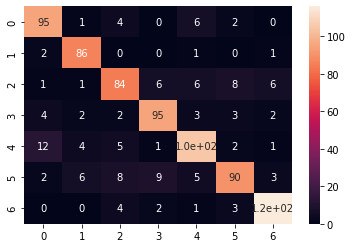

In [23]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [25]:
from sklearn.linear_model import PassiveAggressiveClassifier

PAC_model = PassiveAggressiveClassifier()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    PAC_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [26]:
from sklearn.metrics import classification_report

y_pred = PAC_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       108
           1       0.95      0.69      0.80        90
           2       0.95      0.34      0.50       112
           3       0.84      0.52      0.64       111
           4       0.31      0.98      0.47       130
           5       1.00      0.27      0.42       123
           6       0.93      0.79      0.85       126

    accuracy                           0.61       800
   macro avg       0.85      0.61      0.64       800
weighted avg       0.84      0.61      0.63       800



<AxesSubplot:>

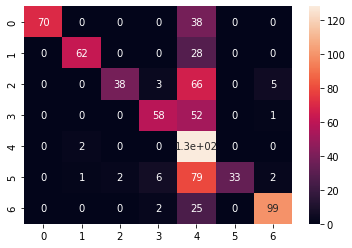

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [28]:
from sklearn.linear_model import Perceptron

Per_model = Perceptron()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    Per_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [29]:
from sklearn.metrics import classification_report

y_pred = Per_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       108
           1       0.92      0.64      0.76        90
           2       0.86      0.48      0.62       112
           3       0.45      0.94      0.61       111
           4       0.51      0.91      0.65       130
           5       1.00      0.43      0.60       123
           6       0.97      0.60      0.75       126

    accuracy                           0.68       800
   macro avg       0.81      0.67      0.69       800
weighted avg       0.81      0.68      0.68       800



<AxesSubplot:>

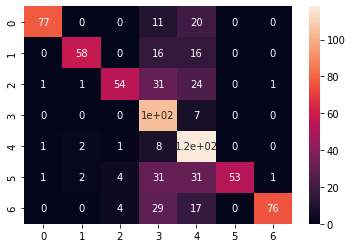

In [30]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [31]:
from sklearn.linear_model import SGDClassifier

SGD_C_model = SGDClassifier()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    SGD_C_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [32]:
from sklearn.metrics import classification_report

y_pred = SGD_C_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       108
           1       0.91      0.68      0.78        90
           2       0.43      0.87      0.57       112
           3       0.72      0.86      0.78       111
           4       0.92      0.50      0.65       130
           5       0.77      0.72      0.74       123
           6       0.93      0.80      0.86       126

    accuracy                           0.73       800
   macro avg       0.81      0.73      0.74       800
weighted avg       0.81      0.73      0.74       800



<AxesSubplot:>

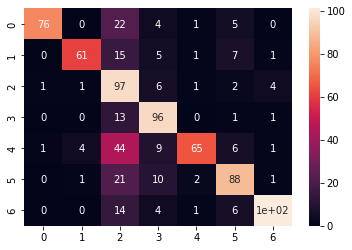

In [33]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# SVC_model = SVC()

# grid_param = {
#     'C': [0.1,10,10],
#     'kernel': ['linear','poly','rbf','sigmoid'],
#     'gamma': ['scale', 'auto'],
# }
# gd_sr = GridSearchCV(estimator=SVC_model, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
# gd_sr.fit(features,labels)
# best_parameters = gd_sr.best_params_
# print(best_parameters)
# best_score = gd_sr.best_score_
# print(best_score)

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import cross_val_score

# model = LinearSVC()
# entries = []
# model_name = model.__class__.__name__
# accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=3)
# for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])